# NOVAAN Performance Testing
NOVA Anbieter Version: 2.63.6

NOVA Services Version: 2.3

Test-ID: 20161206-181821-696

In [72]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
def summarize(data):
    print("Number of measurements: {}".format(len(data)))
    print("Measured request types:\n  {}".format('\n  '.join(data['Type'].unique())))
    print("Test duration (minutes): {}".format(np.round(data['StartMillis'].max() / 60000.0, 1)))
    print("Number of threads: {}".format(data['ThreadId'].unique().size))

## Test Summary

In [73]:
file = 'stresstest_online_2.63.6_20161206-181821-696.csv.gz'
data = pd.read_csv(file).sort_values(by='StartMillis')
data['RunMinute'] = np.round(data['StartMillis']/60000.0).astype(int)
summarize(data)
data.head()

Number of measurements: 26986
Measured request types:
  Klang1WeganfrageTask
  Klang2Task
  Klang3Task
  Klang4Task
  Klang5Task
Test duration (minutes): 40.0
Number of threads: 10


,Type,ThreadId,StartMillis,DurationMillis,ResponseSize,ResultType,ExceptionInfo,Pivot,RunMinute
1,Klang1WeganfrageTask,69,4,463,30586,OK,NaN,NaN,0
81,Klang1WeganfrageTask,71,4,6408,103626,OK,NaN,NaN,0
187,Klang1WeganfrageTask,68,4,13718,87944,OK,NaN,NaN,0
45,Klang1WeganfrageTask,70,5,3556,45798,OK,NaN,NaN,0
28,Klang1WeganfrageTask,66,5,2337,45778,OK,NaN,NaN,0


## Client-side statistics per Klang

In [18]:
def percentile(n):
    """Percentile wrapper esp. for groupby"""
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [74]:
data.groupby('Type')['DurationMillis'].agg([np.size, np.mean, np.median, percentile(95)]).round({'mean': 1})

,size,mean,median,percentile_95
Type,,,,
Klang1WeganfrageTask,6004,3010.1,711,14259.25
Klang2Task,5504,61.1,42,144.00
Klang3Task,5162,59.5,52,86.00
Klang4Task,5161,228.7,244,412.00
Klang5Task,5155,115.0,104,175.00


### Duration histograms

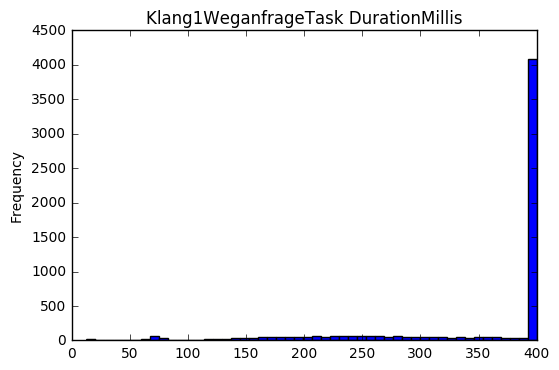

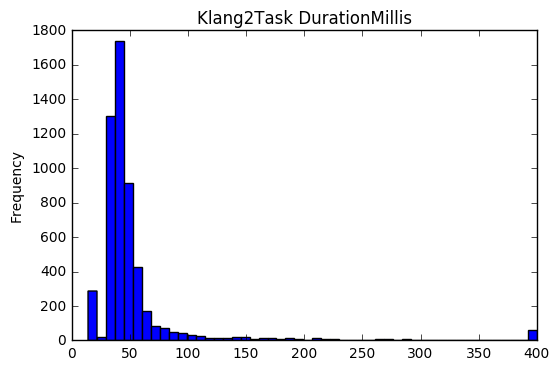

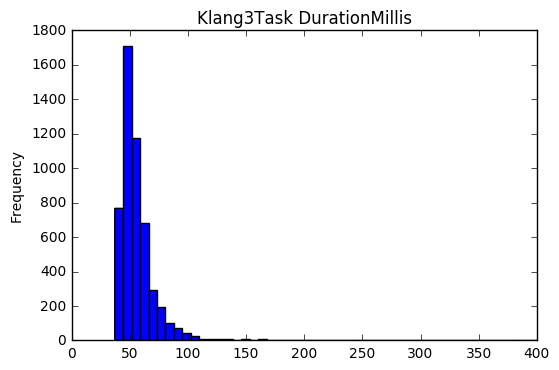

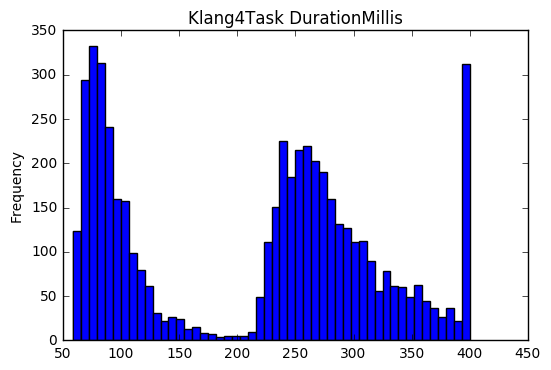

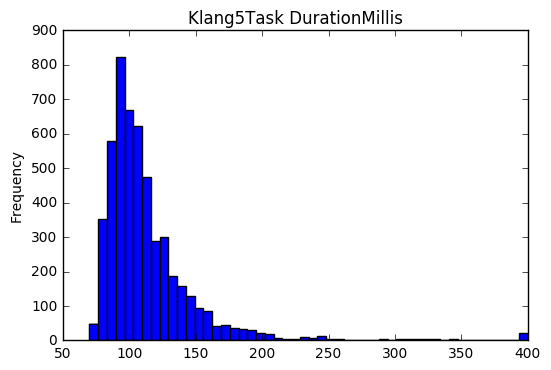

In [92]:
data['DurationMillisBounded'] = np.minimum(400, data.DurationMillis)
for typ in sorted(data.Type.unique()):
    plt.figure()
    data[data['Type']==typ]['DurationMillisBounded'].plot(kind='hist', bins=50)
    plt.title('{} DurationMillis'.format(typ))
del data['DurationMillisBounded']

### Mean Durations over Time

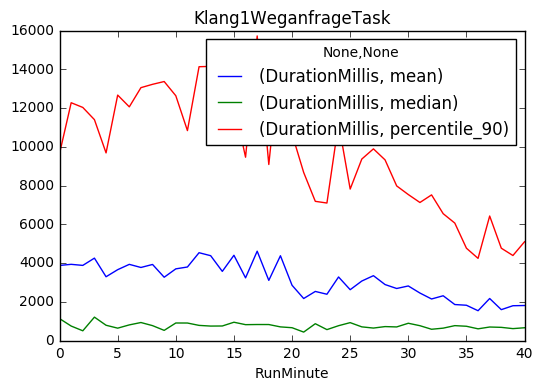

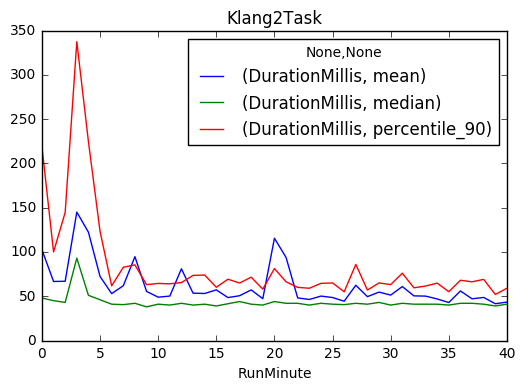

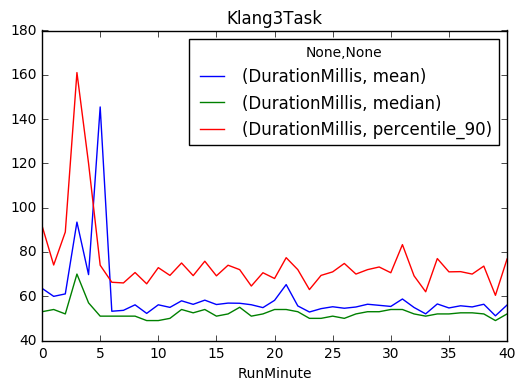

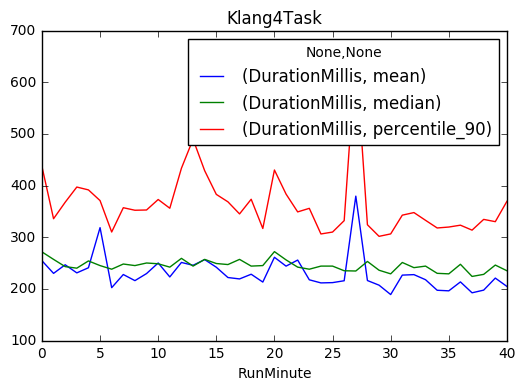

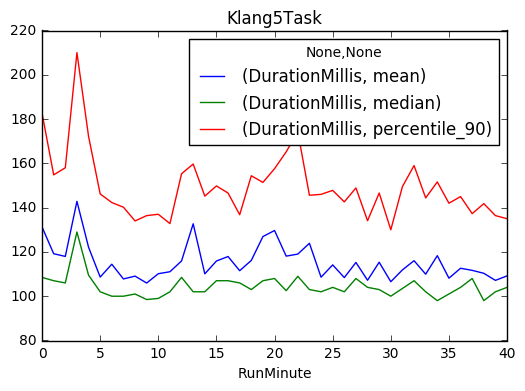

In [22]:
for name, group in data.groupby('Type'):
    group.groupby('RunMinute').aggregate({'DurationMillis': [np.mean, np.median, percentile(90)]}).plot()
    plt.title(name)

In [67]:
df = pd.DataFrame({'a': [1, 2,3 ], 'b': [9, 8, 7]})
df.shape

(3, 2)